# **Results**

In [32]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'serif'

# load modules
from model_nvfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_792/115583694.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Setup**

In [33]:
model = model_bufferstock()

In [34]:
sol = model.sol
par = model.par
aux = model.aux

model.setup()
model.allocate()
model.create_grids()

**Solve with NFVI**

In [35]:
model.solve_nvfi()

T ===========  9
T ===========  8
T ===========  7
T ===========  6
T ===========  5
T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


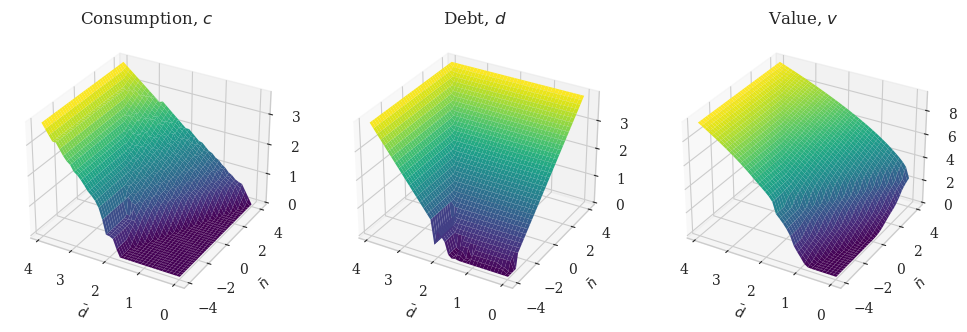

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d_bar, n_bar = np.meshgrid(aux.grid_d, aux.grid_n)
c = sol.c[7,:,:,0]
d = sol.d[7,:,:,0]
v = sol.v[7,:,:,0]

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

ax1.plot_surface(d_bar, n_bar, c, cmap='viridis')
ax2.plot_surface(d_bar, n_bar, d, cmap='viridis')
ax3.plot_surface(d_bar, n_bar, v, cmap='viridis')

ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::1])
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::1])
ax3.set_xlim(ax3.get_xlim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::1])

ax1.set_xlabel(r'$\bar{d}$')
ax1.set_ylabel(r'$\bar{n}$')
ax2.set_xlabel(r'$\bar{d}$')
ax2.set_ylabel(r'$\bar{n}$')
ax3.set_xlabel(r'$\bar{d}$')
ax3.set_ylabel(r'$\bar{n}$')

ax1.set_title(r'Consumption, $c$')
ax2.set_title(r'Debt, $d$')
ax3.set_title(r'Value, $v$')

plt.show()

**Solve with VFI**

In [12]:
model.solve_vfi()

T =  4
T =  3
T =  2
T =  1
T =  0


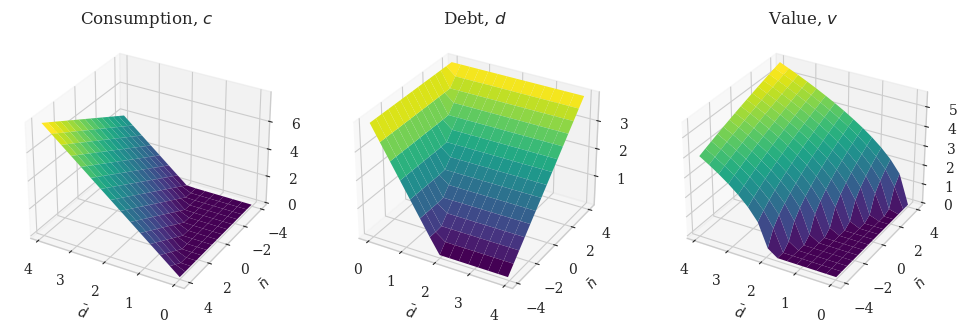

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d_bar, n_bar = np.meshgrid(aux.grid_d, aux.grid_n)
c = sol.c[4,:,:,1]
d = sol.d[4,:,:,1]
v = sol.v[4,:,:,1]

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

ax1.plot_surface(d_bar, n_bar, c, cmap='viridis')
ax2.plot_surface(d_bar, n_bar, d, cmap='viridis')
ax3.plot_surface(d_bar, n_bar, v, cmap='viridis')

ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_xlim(ax2.get_xlim()[::1])
ax2.set_ylim(ax2.get_ylim()[::1])
ax3.set_xlim(ax3.get_xlim()[::-1])
ax3.set_ylim(ax3.get_ylim()[::1])

ax1.set_xlabel(r'$\bar{d}$')
ax1.set_ylabel(r'$\bar{n}$')
ax2.set_xlabel(r'$\bar{d}$')
ax2.set_ylabel(r'$\bar{n}$')
ax3.set_xlabel(r'$\bar{d}$')
ax3.set_ylabel(r'$\bar{n}$')

ax1.set_title(r'Consumption, $c$')
ax2.set_title(r'Debt, $d$')
ax3.set_title(r'Value, $v$')

plt.show()

**State space**

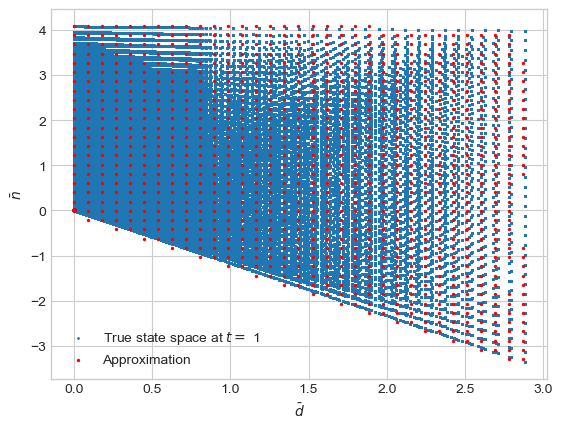

In [116]:
model.plot_state_space(t_plot=1,true_space=True)